# Importing libraries

In [181]:
# Helper libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# Visualization libraries
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Exploring Data

In [200]:
# Load the dataset
data = pd.read_csv("House price dataset.csv")
display(data.head())

,Id,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,GarageType,MSZoning,SalePrice
0,1,7,1710,2003,856,2,1,2,548,Attchd,RL,208500
1,2,6,1262,1976,1262,2,0,2,460,Attchd,RL,181500
2,3,7,1786,2001,920,2,1,2,608,Attchd,RL,223500
3,4,7,1717,1915,756,1,0,3,642,Detchd,RL,140000
4,5,8,2198,2000,1145,2,1,3,836,Attchd,RL,250000


In [201]:
# Number of rows and column in data
data.shape

(1460, 12)

In [202]:
# Drop the ID column, since it is not a feature
data.drop(columns=['Id'], inplace=True)

In [203]:
# Data Description
display(data.describe())

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1971.267808,1057.429452,1.565068,0.382877,1.767123,472.980137,180921.195890
std,1.382997,525.480383,30.202904,438.705324,0.550916,0.502885,0.747315,213.804841,79442.502883
min,1.000000,334.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,1129.500000,1954.000000,795.750000,1.000000,0.000000,1.000000,334.500000,129975.000000
50%,6.000000,1464.000000,1973.000000,991.500000,2.000000,0.000000,2.000000,480.000000,163000.000000
75%,7.000000,1776.750000,2000.000000,1298.250000,2.000000,1.000000,2.000000,576.000000,214000.000000
max,10.000000,5642.000000,2010.000000,6110.000000,3.000000,2.000000,4.000000,1418.000000,755000.000000


In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1460 non-null   int64 
 1   GrLivArea    1460 non-null   int64 
 2   YearBuilt    1460 non-null   int64 
 3   TotalBsmtSF  1460 non-null   int64 
 4   FullBath     1460 non-null   int64 
 5   HalfBath     1460 non-null   int64 
 6   GarageCars   1460 non-null   int64 
 7   GarageArea   1460 non-null   int64 
 8   GarageType   1379 non-null   object
 9   MSZoning     1460 non-null   object
 10  SalePrice    1460 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 125.6+ KB


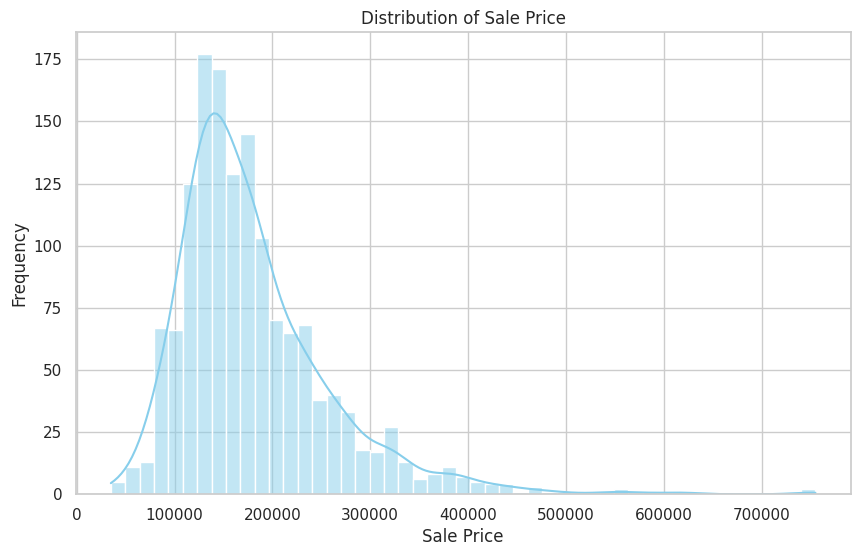

In [205]:
# Distribution of Sale Price

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='SalePrice', kde=True, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Observation:
- It's a left skewed distribution







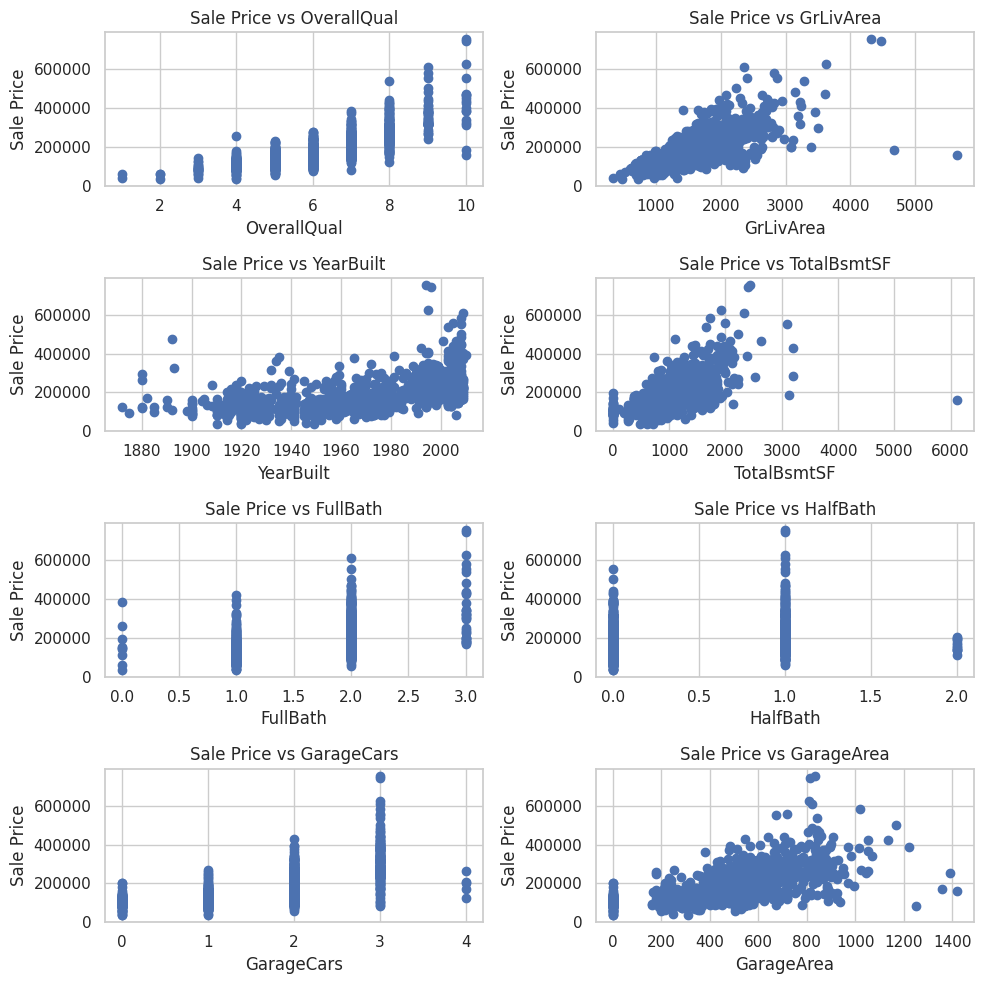

In [206]:
# Bivariate Analysis - Comparing the features with Sale Price

def plot_scatter_chart(data, features):
    num_of_features = len(features)
    num_rows = (num_of_features - 1) // 2 + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=min(2, num_of_features), figsize=(10, 10))

    for i, feature in enumerate(features):
        row_idx = i // 2
        col_idx = i % 2

        if num_rows == 1:
            ax = axes[col_idx]
        else:
            ax = axes[row_idx, col_idx]

        ax.scatter(data[feature], data['SalePrice'], alpha=1)
        ax.set_title(f'Sale Price vs {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Sale Price')

    plt.tight_layout()
    plt.show()


features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'GarageCars', 'GarageArea']
plot_scatter_chart(data, features)


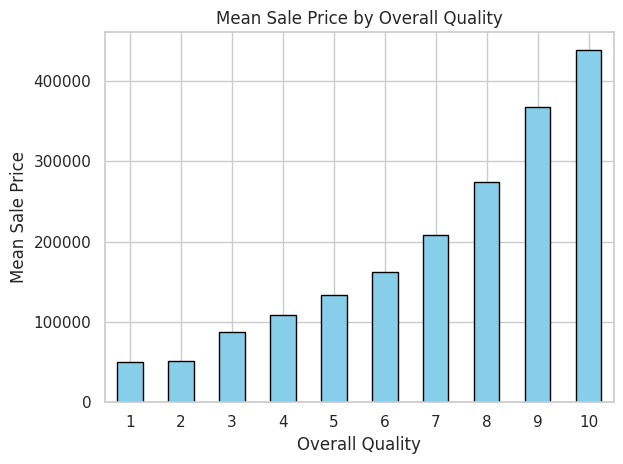

In [207]:
# Grouping data by OverallQual and calculating mean SalePrice for each

overall_qual_mean_price = data.groupby('OverallQual')['SalePrice'].mean()
overall_qual_mean_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Observation:
The selling price of the house is high if the overall quality is high

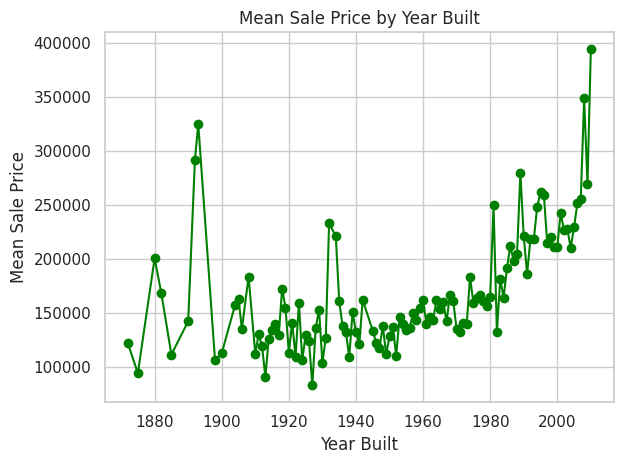

In [208]:
# Grouping data by YearBuilt and calculating mean SalePrice for each year

year_built_mean_price = data.groupby('YearBuilt')['SalePrice'].mean()
year_built_mean_price.plot(kind='line', color='green', marker='o', linestyle='-')
plt.title('Mean Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Sale Price')
plt.tight_layout()
plt.show()


Observation:
- The house price increases YoY
- There is an abnormal surge in house price between year 1885-1900

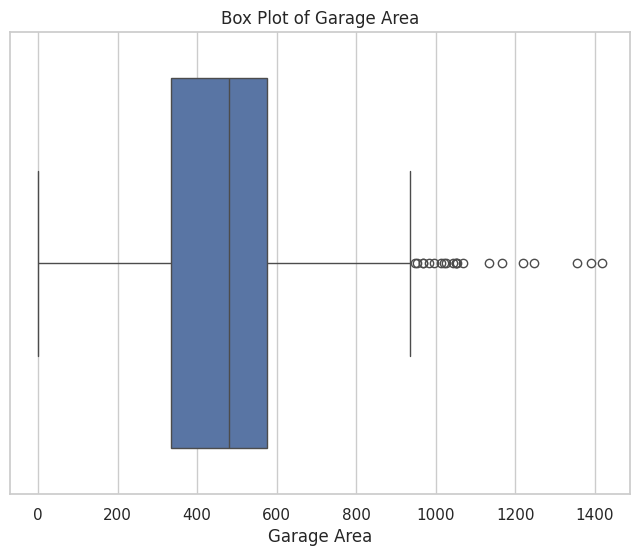

In [209]:
# Visualizing Garage Area Distribution

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['GarageArea'])
plt.title('Box Plot of Garage Area')
plt.xlabel('Garage Area')
plt.show()

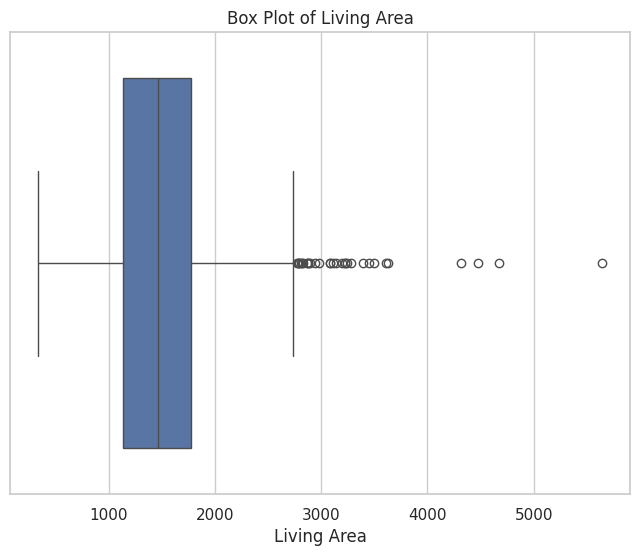

In [210]:

# Visualizing Living Area Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['GrLivArea'])
plt.title('Box Plot of Living Area')
plt.xlabel('Living Area')
plt.show()

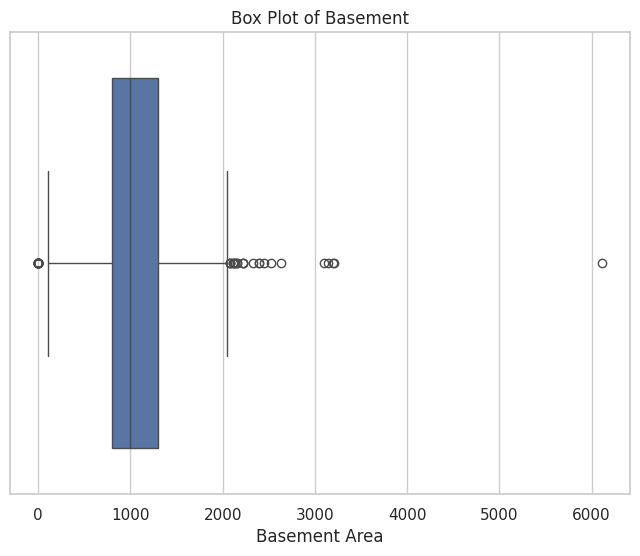

In [211]:
# Visualizing Basement Area Distribution

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['TotalBsmtSF'])
plt.title('Box Plot of Basement')
plt.xlabel('Basement Area')
plt.show()

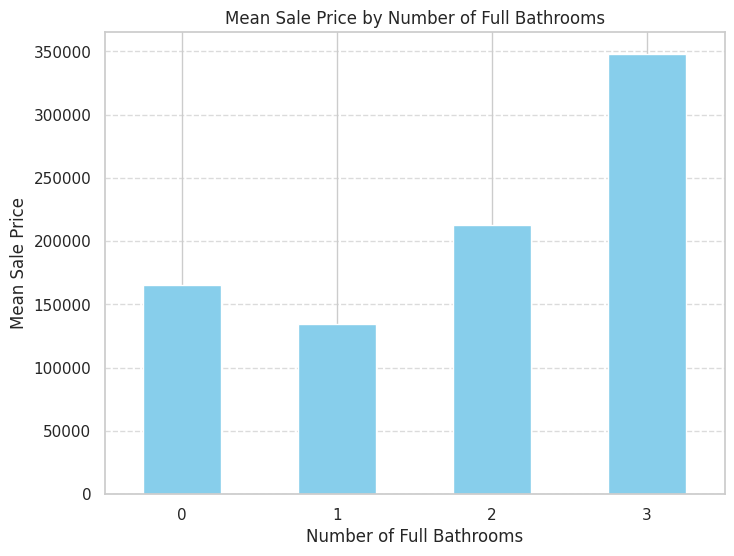

In [212]:
# Visualizing Mean sale price by number of FullBath

mean_sale_price = data.groupby('FullBath')['SalePrice'].mean()
plt.figure(figsize=(8, 6))
mean_sale_price.plot(kind='bar', color='skyblue')
plt.title('Mean Sale Price by Number of Full Bathrooms')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


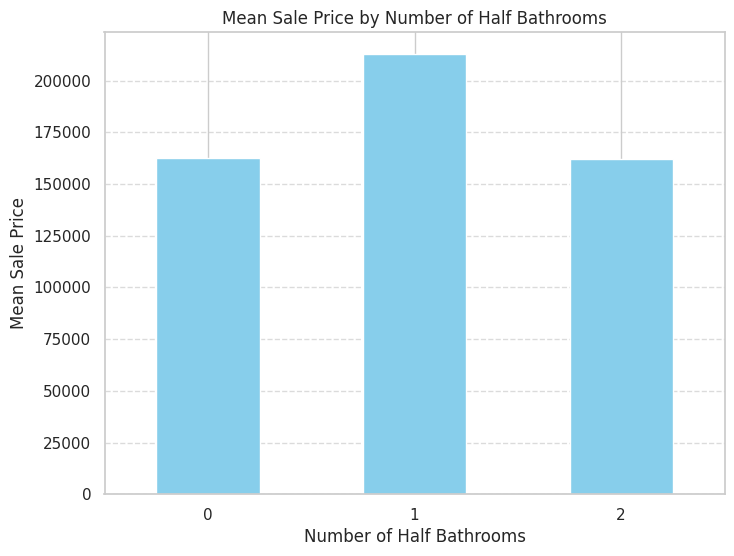

In [213]:
# Visualizing Mean sale price by number of HalfBath

mean_sale_price = data.groupby('HalfBath')['SalePrice'].mean()
plt.figure(figsize=(8, 6))
mean_sale_price.plot(kind='bar', color='skyblue')
plt.title('Mean Sale Price by Number of Half Bathrooms')
plt.xlabel('Number of Half Bathrooms')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [214]:
# Handling Outliers: Replace values greater than the threshold with the 95th percentile value

# Garage Area
garage_threshold_value = data['GarageArea'].quantile(0.95)
data['GarageArea'] = data['GarageArea'].apply(lambda x: garage_threshold_value if x > 1300 else x)

# Living Area
la_threshold_value = data['GrLivArea'].quantile(0.95)
data['GrLivArea'] = data['GrLivArea'].apply(lambda x: la_threshold_value if x > 4000 else x)

# Basement Area
ba_threshold_value = data['TotalBsmtSF'].quantile(0.95)
data['TotalBsmtSF'] = data['TotalBsmtSF'].apply(lambda x: ba_threshold_value if x > 3000 else x)

In [215]:
# Handling Missing Value

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(data['GarageType'].values.reshape(-1, 1))
data['GarageType'] = [garage_type for data in imputed_data for garage_type in data]
print("Number of null rows in garage type:", data['GarageType'].isnull().sum())

Number of null rows in garage type: 0


In [216]:
# One-hot Encoding: Converting object to int columns

categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['GarageType', 'MSZoning'], dtype='object')


In [217]:
# One-hot encode 'GarageType'
one_hot_encoded = pd.get_dummies(data['GarageType'], prefix='Garage')
data = pd.concat([data, one_hot_encoded], axis=1)

# One-hot encode 'MSZoning'
one_hot_encoded = pd.get_dummies(data['MSZoning'], prefix='MSZone')
data = pd.concat([data, one_hot_encoded], axis=1)

data.drop(columns=['GarageType', "MSZoning"], axis=1, inplace=True)
data.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice,Garage_2Types,Garage_Attchd,Garage_Basment,Garage_BuiltIn,Garage_CarPort,Garage_Detchd,MSZone_C (all),MSZone_FV,MSZone_RH,MSZone_RL,MSZone_RM
0,7,1710.0,2003,856.0,2,1,2,548.0,208500,False,True,False,False,False,False,False,False,False,True,False
1,6,1262.0,1976,1262.0,2,0,2,460.0,181500,False,True,False,False,False,False,False,False,False,True,False
2,7,1786.0,2001,920.0,2,1,2,608.0,223500,False,True,False,False,False,False,False,False,False,True,False
3,7,1717.0,1915,756.0,1,0,3,642.0,140000,False,False,False,False,False,True,False,False,False,True,False
4,8,2198.0,2000,1145.0,2,1,3,836.0,250000,False,True,False,False,False,False,False,False,False,True,False


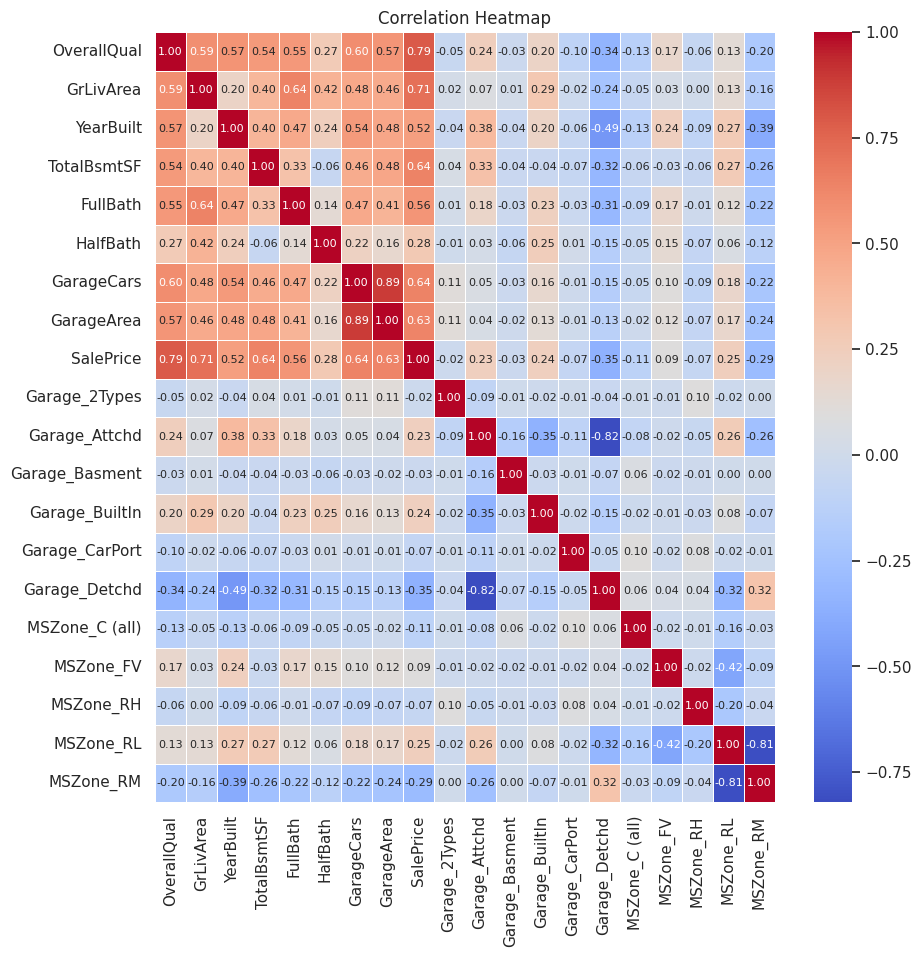

In [220]:
# Visualizing Correlation between the data

correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [222]:
# Drop columns with high correlation
# Dropping "Garage_Attachd", "MSZone_RL", since they have low correlation with Sale price than "Garage_Detchd", "MSZone_RM"
data.drop(columns=["Garage_Attchd", "MSZone_RL"], axis=1, inplace=True)

In [226]:
sale_price_correlation_matrix = data.corr()["SalePrice"].sort_values(ascending=False)
sale_price_correlation_matrix

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.709745
TotalBsmtSF       0.644073
GarageCars        0.640409
GarageArea        0.632583
FullBath          0.560664
YearBuilt         0.522897
HalfBath          0.284108
Garage_BuiltIn    0.235449
MSZone_FV         0.089950
Garage_2Types    -0.023974
Garage_Basment   -0.029425
MSZone_RH        -0.065429
Garage_CarPort   -0.070371
MSZone_C (all)   -0.111257
MSZone_RM        -0.288065
Garage_Detchd    -0.354141
Name: SalePrice, dtype: float64

In [269]:
# Splitting data into train test split

X = data.drop(columns=['SalePrice'])
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [270]:
# Define the regression models to identify the most effective one

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [271]:
# Define the cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
accuracy_results = []

# Normalize the data and train the models
for model in models:

    # Perform cross-validation and calculate accuracy
    accuracy_scores = []

    for train_index, test_index in cv.split(X_train):

        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        accuracy_fold = model.score(X_test_fold, y_test_fold)
        accuracy_scores.append(accuracy_fold)

    mean_accuracy = np.mean(accuracy_scores)
    accuracy_results.append(mean_accuracy)

for i, model in enumerate(models):
    print(f"{model.__class__.__name__} Accuracy: {accuracy_results[i]}")


LinearRegression Accuracy: 0.780854082235517
Ridge Accuracy: 0.7814501942051819
Lasso Accuracy: 0.7808754421775702
RandomForestRegressor Accuracy: 0.7901533694026954
GradientBoostingRegressor Accuracy: 0.7843288220799257


Observations:
- RandomForestRegressor out perform the other models

In [272]:
rf_regressor = RandomForestRegressor(random_state=10)
param_grid = {
    'n_estimators': [50, 75, 100, 125, 150]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Best Parameters: {'n_estimators': 100}
Mean Squared Error: 753961694.2883226


In [273]:
best_regressor_model = RandomForestRegressor(n_estimators=100,random_state=10)
cv = KFold(n_splits=10, shuffle=True, random_state=10)

accuracy_scores = []
for train_index, test_index in cv.split(X_train):

    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    best_regressor_model.fit(X_train_fold, y_train_fold)
    accuracy_fold = best_regressor_model.score(X_test_fold, y_test_fold)
    accuracy_scores.append(accuracy_fold)

mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy with best model:", mean_accuracy)

Mean Accuracy with best model: 0.8066445737982205


In [274]:
# Make predictions
y_pred = best_regressor_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 18316.821088878016
Mean Squared Error (MSE): 749154038.983542
Root Mean Squared Error (RMSE): 27370.678453110035
R-squared (R2) Score: 0.8926420216396318


Fin!